Height of Template: 324 & Width of Template: 158


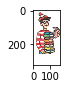

In [1]:
# import the necessary packages
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
% matplotlib inline

# Insert the location of the images
puzzle_address = 'waldo_zoo.jpg'
waldo_address = 'waldo_books_dim.jpg'

# load the puzzle and waldo images
puzzle = cv2.imread(puzzle_address)
waldo = cv2.imread(waldo_address)
(waldoHeight, waldoWidth) = waldo.shape[:2]

# Display the dimensions and plot the image of Waldo
print("Height of Template: %d & Width of Template: %d" %(waldoHeight, waldoWidth))

# cv2 reads the image in BGR, we need to convert it to RGB values to see the plot. 
# What happens if you do not convert?
# Go ahead and try it out. Comment the next line and run the cell.
waldo_rgb = cv2.cvtColor(waldo,cv2.COLOR_RGB2BGR)

plt.figure(figsize=(1,1))
plt.imshow(waldo_rgb)

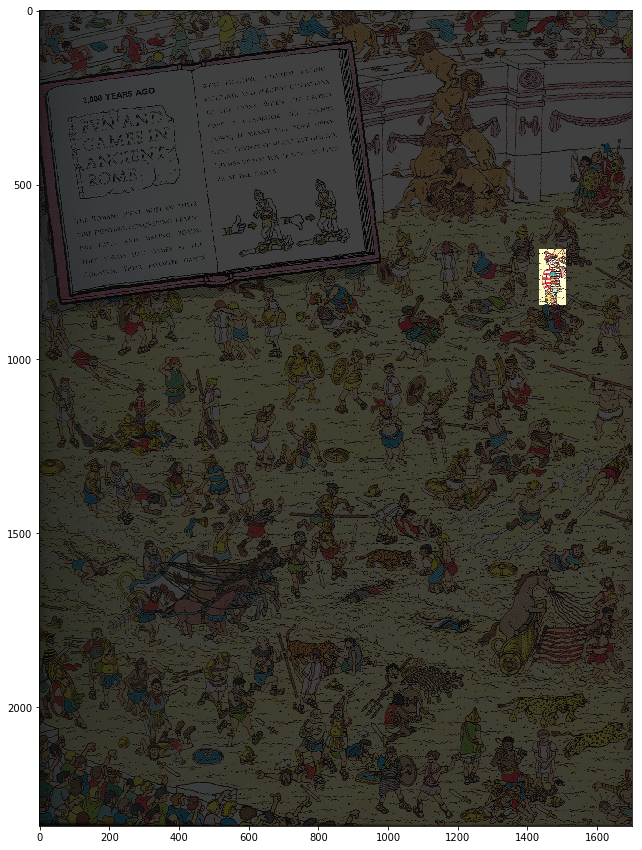

In [2]:
# find the waldo in the puzzle


result = cv2.matchTemplate(puzzle, waldo, cv2.TM_CCOEFF)
(_, _, minLoc, maxLoc) = cv2.minMaxLoc(result)

tempVal = 0
for x in range(0,76):
    #5 is the right size
#------------------RESIZE----------------------
    newx,newy = waldo.shape[1] - x*waldo.shape[1]/100,waldo.shape[0] - x*waldo.shape[0]/100
    newimage = cv2.resize(waldo,(newx,newy))
    (waldoHeight, waldoWidth) = newimage.shape[:2]
    
    result = cv2.matchTemplate(puzzle, newimage, cv2.TM_CCOEFF_NORMED)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(result)
    #print("min val is : ", minVal, "Max is: " ,maxVal)
    if(maxVal > tempVal ):
      #  print(x)
        tempVal = maxVal
        tempLoc = maxLoc
        width = waldoWidth
        height = waldoHeight


# result = cv2.matchTemplate(puzzle, newimage, cv2.TM_CCOEFF)
# (_, _, minLoc, maxLoc) = cv2.minMaxLoc(result)

# grab the bounding box of waldo and extract him from
# the puzzle image
topLeft = tempLoc
botRight = (topLeft[0] + width, topLeft[1] + height)
roi = puzzle[topLeft[1]:botRight[1], topLeft[0]:botRight[0]]


# construct a darkened transparent 'layer' to darken everything
# in the puzzle except for waldo
mask = np.zeros(puzzle.shape, dtype = "uint8")
puzzle = cv2.addWeighted(puzzle, 0.25, mask, 0.75, 0)



puzzle[topLeft[1]:botRight[1], topLeft[0]:botRight[0]] = roi
 
# display the images
cv2.imwrite("Puzzle_Result.jpg", puzzle)
result_rgb = cv2.cvtColor(puzzle,cv2.COLOR_RGB2BGR)
plt.figure(figsize=(15,15))
plt.imshow(result_rgb)